# Would neighborhood contribute on Airbnb ratings

### Executive summary

Investors intetested in Airbnb in Hong Kong, should look for districts with hotels and a Japanese restaurant nearby. Location ratings has positive correlation with final ratings.

### Introduction

In Hong Kong, Airbnb is getting popular. According to Inside Airbnb, there are over eight thousand listing in business. Accommodates can leave ratings after their stay. New comers on Airbnb should understand the market before their investment on premise. They should aware of the neighborhood around the premise. 

Report will study the existing listings. Provide recommendation on neighborhood worth for investment. A focus on relationship of neighborhood and ratings. Foursquare API could contribute to the research by its broad database of locations. 

<hr>

### Research

By using k-means clustering, could group listings into clusters for further study.

Foursquare API will provide popular venues around each clusters for further study

In [1]:
import pandas as pd
import numpy as np
pd.options.display.max_rows = 100
pd.options.display.max_columns = 200

basePath = r"E:\JUPYTER_NOTEBOOK\week 6 ffinal assignment machine learning of python\\"
print(basePath)

E:\JUPYTER_NOTEBOOK\week 6 ffinal assignment machine learning of python\\


#### Define Foursquare Credentials and Version

In [263]:
CLIENT_ID = 'xxx' #  Foursquare ID
CLIENT_SECRET = 'xxx' #  Foursquare Secret
VERSION = '20190401' # Foursquare API version

print('Credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET: ' + CLIENT_SECRET)

Credentails:
CLIENT_ID: xxx
CLIENT_SECRET: xxx


#### Inside Airbnb data

In [3]:
# http://data.insideairbnb.com/china/hk/hong-kong/2019-03-11/visualisations/listings.csv
df_list = pd.read_csv(r"E:\JUPYTER_NOTEBOOK\week 6 ffinal assignment machine learning of python\Airbnb\listings.csv")
print(df_list.shape)
df_list.head(1)

(10971, 106)


e:\jupyter_notebook\venv\venv_capstone\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (61) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,69074,https://www.airbnb.com/rooms/69074,20190311061202,2019-03-11,Beautiful oasis of plants & art @ best location,An ideal Hong location any visitor--hip withou...,"Filled with plants and art, this one bedroom u...",An ideal Hong location any visitor--hip withou...,none,"In the upper part of trendy, hip Sheung Wan, w...",NaN,Buses pass often along Hollywood Road and taxi...,"All access, except one section of the wardrobe.","If a guest is staying there, I am likely abroa...",Everything to make your stay as comfortable as...,NaN,NaN,https://a0.muscache.com/im/pictures/84364564/1...,NaN,160139,https://www.airbnb.com/users/show/160139,Amy,2010-07-07,Hong Kong,"I've been with AirBnB now for many years, ofte...",within a few hours,100%,NaN,t,https://a0.muscache.com/im/users/160139/profil...,https://a0.muscache.com/im/users/160139/profil...,Sheung Wan,2,2,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Sheung Wan, Hong Kong",Central & Western District,Central & Western,NaN,Sheung Wan,NaN,NaN,Hong Kong,"Sheung Wan, Hong Kong",HK,Hong Kong,22.28352,114.15018,t,Apartment,Entire home/apt,3,1.0,1.0,2.0,Real Bed,"{""Cable TV"",Internet,Wifi,""Air conditioning"",K...",NaN,"$1,413.00",NaN,"$29,830.00","$2,355.00",$314.00,2,$157.00,3,365,3,3,365,365,3.0,365.0,3 weeks ago,t,7,31,61,151,2019-03-11,122,34,2011-02-14,2019-02-08,97.0,10.0,10.0,10.0,10.0,10.0,9.0,f,NaN,NaN,f,f,strict_14_with_grace_period,f,f,1,1,0,0,1.24


In [4]:
# Drop unnecessary columns
df_list = df_list[['id','host_since','host_response_rate','host_acceptance_rate','host_neighbourhood','host_listings_count','host_total_listings_count','street','neighbourhood','neighbourhood_cleansed','smart_location','latitude','longitude','property_type','room_type','accommodates','bathrooms','bedrooms','beds','bed_type','price','security_deposit','cleaning_fee','guests_included','extra_people','minimum_nights','maximum_nights','number_of_reviews','first_review','last_review','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value','reviews_per_month']]

In [ ]:
# Turn text into numbers
def cleanMoney(col):
    df_list[col].fillna(np.nan,inplace=True)
    df_list[col] = df_list[col].str.replace(',', '')
    df_list[col] = df_list[col].str.replace('$', '')
    df_list[col] = df_list[col].astype(float)
    df_list[col].fillna(-1,inplace=True)
    df_list[col] = df_list[col].astype(int)
    return

cleanMoney('price')
cleanMoney('security_deposit')
cleanMoney('cleaning_fee')
cleanMoney('extra_people')

In [7]:
# Turn text into numbers
def floatToInt(col):
    df_list[col].fillna(-1,inplace=True)
    df_list[col] = df_list[col].astype(int)
    return

floatToInt('review_scores_rating')
floatToInt('review_scores_accuracy')
floatToInt('review_scores_cleanliness')
floatToInt('review_scores_checkin')
floatToInt('review_scores_communication')
floatToInt('review_scores_location')
floatToInt('review_scores_value')

In [8]:
# Remove listings without ratings
print(df_list.shape)
df_list = df_list[df_list['review_scores_rating']>0]
print(df_list.shape)

(10971, 38)
(8124, 38)


In [9]:
print(df_list.neighbourhood_cleansed.value_counts(dropna=False))
print("=======================================================")
print(df_list.groupby('neighbourhood_cleansed')['review_scores_rating'].mean().sort_values())
print("=======================================================")
print(df_list.groupby('neighbourhood_cleansed')['review_scores_rating'].min().sort_values())

Yau Tsim Mong        3349
Central & Western    1776
Wan Chai             1287
Islands               414
Kowloon City          243
Eastern               235
Yuen Long             164
Sham Shui Po          146
Sai Kung              118
North                 107
Southern               69
Sha Tin                68
Kwun Tong              37
Tsuen Wan              32
Tai Po                 26
Tuen Mun               18
Wong Tai Sin           18
Kwai Tsing             17
Name: neighbourhood_cleansed, dtype: int64
neighbourhood_cleansed
Yau Tsim Mong        88.615408
Sham Shui Po         89.369863
Kowloon City         89.395062
Wong Tai Sin         91.555556
Kwai Tsing           91.588235
Wan Chai             92.184149
Islands              92.586957
North                92.616822
Yuen Long            92.932927
Eastern              92.936170
Sha Tin              93.338235
Tsuen Wan            93.593750
Central & Western    93.998874
Kwun Tong            94.594595
Tai Po               94.692308
S

===
On this example, when there is no correlation between 2 variables (when correlation is 0 or near 0) the color is gray. The darkest red means there is a perfect positive correlation, while the darkest blue means there is a perfect negative correlation.

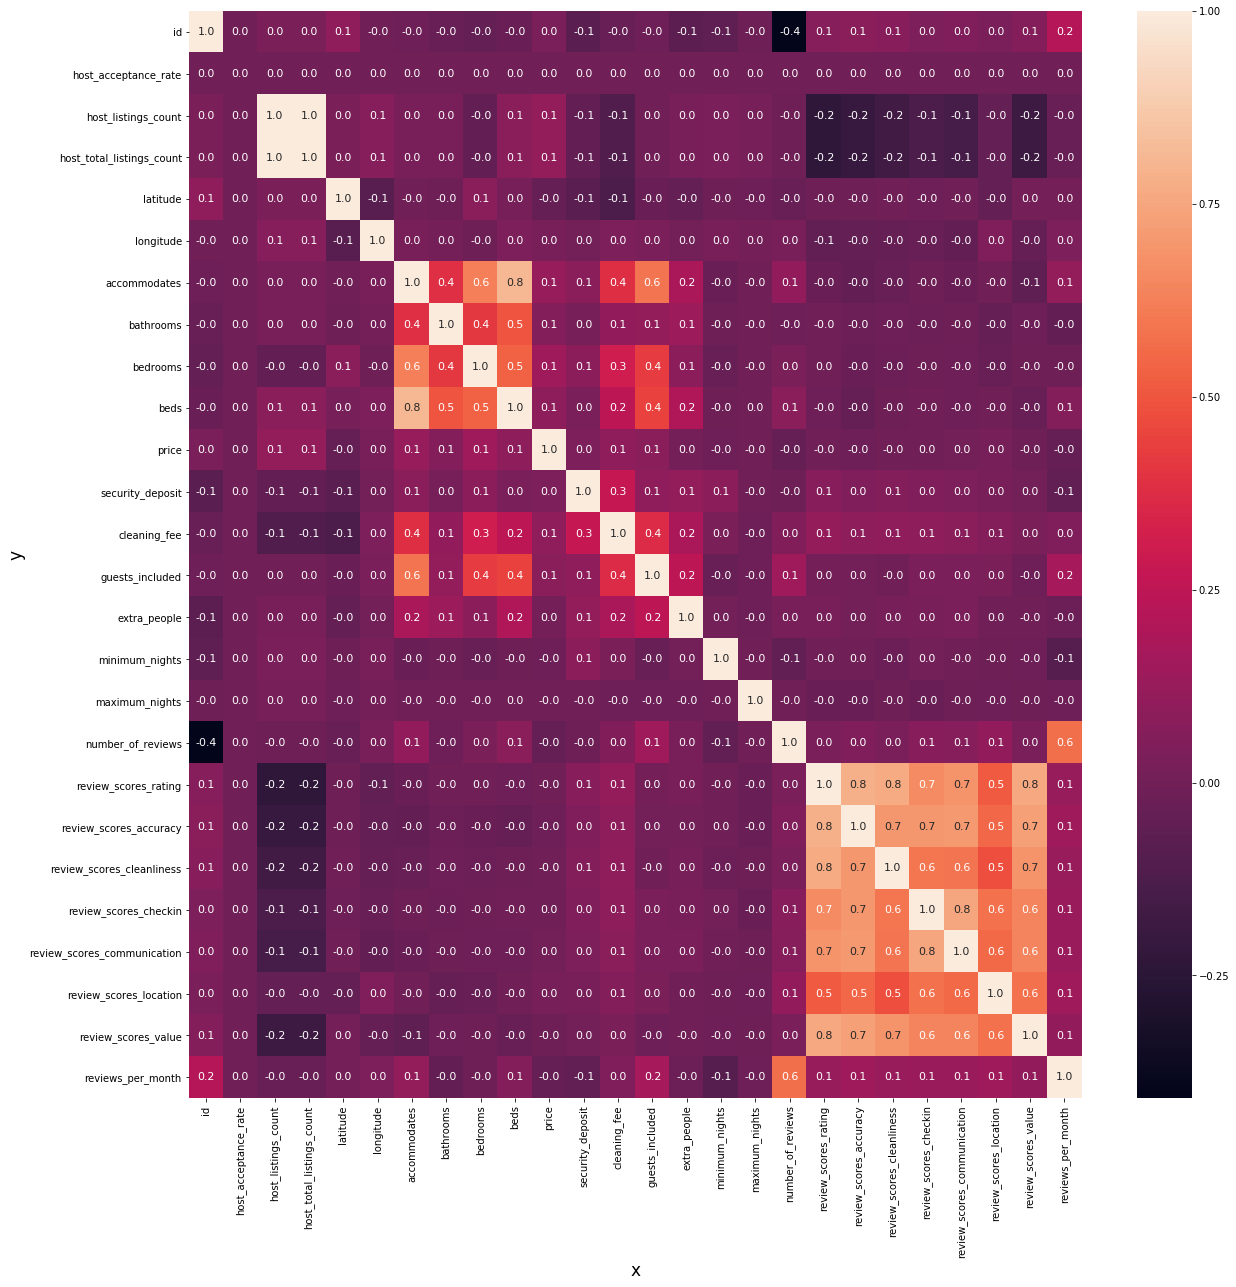

In [12]:
# Heatmap showing correlation of dependent variables against independent variable (rating)
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df_list.corr()
corr_matrix.fillna(0,inplace=True)

plt.figure(figsize=(20,20)) 


sns.heatmap(corr_matrix, annot=True, fmt=".1f",annot_kws={'size':11})

plt.xlabel('x',fontsize=17)
plt.ylabel('y',fontsize=17)

plt.show()

##### === Location coordinates ===

### Cluster Neighborhoods

Run k-means to cluster the neighborhood into 16 clusters.

In [169]:
from pandas.io.json import json_normalize
from sklearn.cluster import KMeans
# set number of clusters 
kclusters = 16

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0,max_iter=1200).fit(df_location_lat_lng)

In [174]:
df_clus_center = pd.DataFrame(data=kmeans.cluster_centers_,columns=['Latitude','Longitude'],index=arr_labels).rename_axis('ClusterLabel').reset_index()
print(df_clus_center.shape)
df_clus_center

(16, 3)


,ClusterLabel,Latitude,Longitude
0,0,22.283772,114.146392
1,1,22.515051,114.070924
2,2,22.211258,114.023837
3,3,22.302024,114.172862
4,4,22.291626,114.012166
5,5,22.301487,114.261416
6,6,22.320249,114.169894
7,7,22.523693,114.126668
8,8,22.270942,113.943321
9,9,22.287687,114.202046


In [176]:
# create map for cluster center
map_clusters = fol.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, cluster in zip(df_a['Latitude'], df_a['Longitude'], df_a['ClusterLabel']):
    label = fol.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    fol.Circle(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
    
map_clusters

#### Display coordinates of 18 clusters onto map

In [116]:
import folium as fol
import matplotlib.cm as cm
import matplotlib.colors as colors

from geopy.geocoders import Nominatim

address = 'Hong Kong, HK'

geolocator = Nominatim(user_agent="To_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of HK are {}, {}.'.format(latitude, longitude))

In [194]:
# create map
map_clusters = fol.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(df_a['latitude'], df_a['longitude'], df_a['neighbourhood_cleansed'], df_a['Cluster Labels']):
    label = fol.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    fol.Circle(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
    
map_clusters

## Get Foursqure popular places of each cluster

In [212]:
import requests

def getNearbyVenues(names, latitudes, longitudes, radius=2000, LIMIT=1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [213]:
hk_venues = getNearbyVenues(names=df_clus_center['ClusterLabel'],
                                   latitudes=df_clus_center['Latitude'],
                                   longitudes=df_clus_center['Longitude']
                                  )

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15


In [217]:
print('There are {} uniques categories.'.format(len(hk_venues['Venue Category'].unique())))

There are 175 uniques categories.


In [218]:
# one hot encoding
hk_onehot = pd.get_dummies(hk_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
hk_onehot['Neighborhood'] = hk_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [hk_onehot.columns[-1]] + list(hk_onehot.columns[:-1])
hk_onehot = hk_onehot[fixed_columns]

hk_onehot.head()

,Zhejiang Restaurant,American Restaurant,Antique Shop,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,BBQ Joint,Bakery,Bar,Beach,Beer Bar,Beer Garden,Beer Store,Beijing Restaurant,Betting Shop,Bookstore,Border Crossing,Brewery,Bubble Tea Shop,Buffet,Building,Burger Joint,Bus Station,Bus Stop,Café,Camera Store,Cantonese Restaurant,Caribbean Restaurant,Cave,Cha Chaan Teng,Chinese Restaurant,Chocolate Shop,Climbing Gym,Clothing Store,Club House,Cocktail Bar,Coffee Shop,Comfort Food Restaurant,Convenience Store,Cosmetics Shop,Creperie,Cricket Ground,Cultural Center,Cupcake Shop,Department Store,Dessert Shop,Dim Sum Restaurant,Donburi Restaurant,Dumpling Restaurant,Electronics Store,Factory,Farm,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Flower Shop,Food & Drink Shop,Food Court,French Restaurant,Fried Chicken Joint,Fujian Restaurant,Furniture / Home Store,Garden,Gas Station,Gastropub,General Entertainment,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hainan Restaurant,Harbor / Marina,Historic Site,History Museum,Hong Kong Restaurant,Hostel,Hotel,Hotel Bar,Hotpot Restaurant,Housing Development,Ice Cream Shop,Indian Restaurant,Indonesian Restaurant,Indoor Play Area,Italian Restaurant,Japanese Restaurant,Jiangsu Restaurant,Juice Bar,Korean Restaurant,Latin American Restaurant,Lounge,Malay Restaurant,Market,Massage Studio,Mediterranean Restaurant,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Mongolian Restaurant,Mountain,Multiplex,Music Store,Music Venue,Neighborhood,New American Restaurant,Noodle House,Optical Shop,Other Great Outdoors,Other Nightlife,Park,Pharmacy,Pier,Pizza Place,Platform,Plaza,Pool,Pub,Racecourse,Ramen Restaurant,Record Shop,Residential Building (Apartment / Condo),Restaurant,Salad Place,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,Science Museum,Seafood Restaurant,Shaanxi Restaurant,Shanghai Restaurant,Shoe Store,Shopping Mall,Shopping Plaza,Snack Place,Soba Restaurant,South Indian Restaurant,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Club,Sri Lankan Restaurant,Stadium,Stationery Store,Steakhouse,Supermarket,Sushi Restaurant,Swiss Restaurant,Szechuan Restaurant,Tailor Shop,Taiwanese Restaurant,Tapas Restaurant,Tea Room,Temple,Thai Restaurant,Toy / Game Store,Trail,Train Station,Turkish Restaurant,Udon Restaurant,Vegetarian / Vegan Restaurant,Video Store,Vietnamese Restaurant,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Yoga Studio
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0

In [220]:
hk_grouped = hk_onehot.groupby('Neighborhood').mean().reset_index()
print(hk_grouped.shape)
hk_grouped.head()

(16, 175)


,Neighborhood,Zhejiang Restaurant,American Restaurant,Antique Shop,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,BBQ Joint,Bakery,Bar,Beach,Beer Bar,Beer Garden,Beer Store,Beijing Restaurant,Betting Shop,Bookstore,Border Crossing,Brewery,Bubble Tea Shop,Buffet,Building,Burger Joint,Bus Station,Bus Stop,Café,Camera Store,Cantonese Restaurant,Caribbean Restaurant,Cave,Cha Chaan Teng,Chinese Restaurant,Chocolate Shop,Climbing Gym,Clothing Store,Club House,Cocktail Bar,Coffee Shop,Comfort Food Restaurant,Convenience Store,Cosmetics Shop,Creperie,Cricket Ground,Cultural Center,Cupcake Shop,Department Store,Dessert Shop,Dim Sum Restaurant,Donburi Restaurant,Dumpling Restaurant,Electronics Store,Factory,Farm,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Flower Shop,Food & Drink Shop,Food Court,French Restaurant,Fried Chicken Joint,Fujian Restaurant,Furniture / Home Store,Garden,Gas Station,Gastropub,General Entertainment,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hainan Restaurant,Harbor / Marina,Historic Site,History Museum,Hong Kong Restaurant,Hostel,Hotel,Hotel Bar,Hotpot Restaurant,Housing Development,Ice Cream Shop,Indian Restaurant,Indonesian Restaurant,Indoor Play Area,Italian Restaurant,Japanese Restaurant,Jiangsu Restaurant,Juice Bar,Korean Restaurant,Latin American Restaurant,Lounge,Malay Restaurant,Market,Massage Studio,Mediterranean Restaurant,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Mongolian Restaurant,Mountain,Multiplex,Music Store,Music Venue,New American Restaurant,Noodle House,Optical Shop,Other Great Outdoors,Other Nightlife,Park,Pharmacy,Pier,Pizza Place,Platform,Plaza,Pool,Pub,Racecourse,Ramen Restaurant,Record Shop,Residential Building (Apartment / Condo),Restaurant,Salad Place,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,Science Museum,Seafood Restaurant,Shaanxi Restaurant,Shanghai Restaurant,Shoe Store,Shopping Mall,Shopping Plaza,Snack Place,Soba Restaurant,South Indian Restaurant,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Club,Sri Lankan Restaurant,Stadium,Stationery Store,Steakhouse,Supermarket,Sushi Restaurant,Swiss Restaurant,Szechuan Restaurant,Tailor Shop,Taiwanese Restaurant,Tapas Restaurant,Tea Room,Temple,Thai Restaurant,Toy / Game Store,Trail,Train Station,Turkish Restaurant,Udon Restaurant,Vegetarian / Vegan Restaurant,Video Store,Vietnamese Restaurant,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Yoga Studio
0,0,0.0,0.0,0.01,0.01,0.00,0.010000,0.0,0.000000,0.02,0.01,0.02,0.000000,0.02,0.0,0.02,0.00,0.0,0.0,0.000000,0.00,0.00,0.00,0.0,0.01,0.000000,0.0,0.060000,0.00,0.010000,0.000000,0.00,0.00,0.060000,0.00,0.0,0.00,0.0,0.05,0.060000,0.0,0.0,0.00,0.01,0.00,0.01,0.0,0.0,0.02,0.00,0.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.01,0.04,0.01,0.0,0.0,0.0,0.0,0.010000,0.000000,0.00,0.01,0.000000,0.01,0.0,0.000000,0.01,0.01,0.0,0.000000,0.0,0.00,0.000000,0.00,0.020000,0.0,0.01,0.000000,0.01,0.030000,0.01,0.000000,0.020000,0.05,0.0,0.01,0.010000,0.0,0.00,0.0,0.00,0.0,0.000000,0.0,0.01,0.000000,0.00,0.0,0.00,0.0,0.00,0.00,0.01,0.0,0.02,0.0,0.00,0.0,0.01,0.0,0.00,0.010000,0.0,0.000000,0.0,0.000000,0.0,0.00,0.0,0.0,0.01,0.01,0.0,0.01,0.000000,0.00,0.010000,0.00,0.0,0.01,0.000000,0.0,0.01,0.0,0.00,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.010000,0.00,0.00,0.00,0.0,0.00,0.0,0.01,0.01,0.0,0.010000,0.0,0.01,0.000000,0.0,0.0,0.03,0.000000,0.02,0.00,0.0,0.03,0.02,0.03
1,1,0.0,0.0,0.00,0.00,0.00,0.047619,0.0,0.000000,0.00,0.00,0.00,0.000000,0.00,0.0,0.00,0.00,0.0,0.0,0.095238,0.00,0.00,0.00,0.0,0.00,0.047619,0.0,0.047619,0.00,0.047619,0.000000,0.00,0.00,0.190476,0.00,0.0,0.00,0.0,0.00,0.000000,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.047619,0.000000,0.00,0.00,0.000000,0.00,0.0,0.000000,0.00,0.00,0.0,0.000000,0.0,0.00,0.047619,0.00,0.047619,0.0,0.00,0.00

In [221]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = hk_grouped['Neighborhood']

for ind in np.arange(hk_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(hk_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,0,Café,Chinese Restaurant,Coffee Shop,Japanese Restaurant,Cocktail Bar,French Restaurant,Indian Restaurant,Yoga Studio,Vegetarian / Vegan Restaurant,Wine Bar
1,1,Spa,Chinese Restaurant,Border Crossing,Bus Station,Hotel,Hong Kong Restaurant,Café,Video Store,Asian Restaurant,Cantonese Restaurant
2,2,Dessert Shop,Chinese Restaurant,Café,Beach,Seafood Restaurant,Coffee Shop,Other Great Outdoors,Snack Place,Brewery,Pier
3,3,Hotel,Japanese Restaurant,Café,Chinese Restaurant,Dessert Shop,Cha Chaan Teng,Noodle House,Coffee Shop,Shopping Mall,Cocktail Bar
4,4,Coffee Shop,Pizza Place,Harbor / Marina,Italian Restaurant,Shopping Mall,Seafood Restaurant,Caribbean Restaurant,Middle Eastern Restaurant,Spanish Restaurant,Café


In [73]:
ser_rating = df_list.groupby('neighbourhood_cleansed')['review_scores_rating'].mean()
ser_location = df_list.groupby('neighbourhood_cleansed')['review_scores_location'].mean()

In [257]:
df_analyze = pd.DataFrame(data=[ser_rating,ser_location]).transpose().reset_index().round(2)

In [258]:
df_analyze = df_analyze[['neighbourhood_cleansed','review_scores_rating','review_scores_location']]
df_analyze

,neighbourhood_cleansed,review_scores_rating,review_scores_location
0,Central & Western,94.00,9.70
1,Eastern,92.94,9.61
2,Islands,92.59,9.40
3,Kowloon City,89.40,9.16
4,Kwai Tsing,91.59,8.71
5,Kwun Tong,94.59,9.41
6,North,92.62,9.58
7,Sai Kung,95.08,9.31
8,Sha Tin,93.34,9.41
9,Sham Shui Po,89.37,9.25


Final view of study point. By correlation analysis pointed that location score has medium relationship to score ratings

In [259]:
df_analyze = pd.merge(df_analyze,df_Cluster_Map,how='left',left_on='neighbourhood_cleansed',right_on='Neiborhood')
df_analyze.drop("Neiborhood",axis=1,inplace=True)
df_analyze = pd.merge(df_analyze,neighborhoods_venues_sorted,left_on='Cluster',right_on='Neighborhood')
df_analyze.drop("Neighborhood",axis=1,inplace=True)
df_analyze

,neighbourhood_cleansed,review_scores_rating,review_scores_location,Cluster,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Central & Western,94.00,9.70,0,Café,Chinese Restaurant,Coffee Shop,Japanese Restaurant,Cocktail Bar,French Restaurant,Indian Restaurant,Yoga Studio,Vegetarian / Vegan Restaurant,Wine Bar
1,Eastern,92.94,9.61,9,Chinese Restaurant,Japanese Restaurant,Hotel,Dessert Shop,Hotel Bar,Cha Chaan Teng,Hong Kong Restaurant,Park,Gym,Bakery
2,Islands,92.59,9.40,2,Dessert Shop,Chinese Restaurant,Café,Beach,Seafood Restaurant,Coffee Shop,Other Great Outdoors,Snack Place,Brewery,Pier
3,Islands,92.59,9.40,4,Coffee Shop,Pizza Place,Harbor / Marina,Italian Restaurant,Shopping Mall,Seafood Restaurant,Caribbean Restaurant,Middle Eastern Restaurant,Spanish Restaurant,Café
4,Islands,92.59,9.40,8,Chinese Restaurant,Thai Restaurant,Café,Sushi Restaurant,Indian Restaurant,Trail,Korean Restaurant,Sporting Goods Shop,Fast Food Restaurant,Shopping Mall
5,Kowloon City,89.40,9.16,6,Coffee Shop,Dim Sum Restaurant,Hotel,Chinese Restaurant,Dessert Shop,Snack Place,Café,Cha Chaan Teng,Dumpling Restaurant,Shopping Mall
6,Sham Shui Po,89.37,9.25,6,Coffee Shop,Dim Sum Restaurant,Hotel,Chinese Restaurant,Dessert Shop,Snack Place,Café,Cha Chaan Teng,Dumpling Restaurant,Shopping Mall
7,Wong Tai Sin,91.56,9.00,6,Coffee Shop,Dim Sum Restaurant,Hotel,Chinese Restaurant,Dessert Shop,Snack Place,Café,Cha Chaan Teng,Dumpling Restaurant,Shopping Mall
8,Kwai Tsing,91.59,8.71,12,Chinese Restaurant,Shopping Mall,Dessert Shop,Noodle House,Cha Chaan Teng,Coffee Shop,Sushi Restaurant,Park,Italian Restaurant,Japanese Restaurant
9,Tsuen Wan,93.59,9.31,12,Chinese Restaurant,Shopping Mall,Dessert Shop,Noodle House,Cha Chaan Teng,Coffee Shop,Sushi Restaurant,Park,Italian Restaurant,Japanese Restaurant


In [262]:
df_analyze.sort_values(by='review_scores_location')

,neighbourhood_cleansed,review_scores_rating,review_scores_location,Cluster,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
8,Kwai Tsing,91.59,8.71,12,Chinese Restaurant,Shopping Mall,Dessert Shop,Noodle House,Cha Chaan Teng,Coffee Shop,Sushi Restaurant,Park,Italian Restaurant,Japanese Restaurant
7,Wong Tai Sin,91.56,9.00,6,Coffee Shop,Dim Sum Restaurant,Hotel,Chinese Restaurant,Dessert Shop,Snack Place,Café,Cha Chaan Teng,Dumpling Restaurant,Shopping Mall
14,Tai Po,94.69,9.08,14,Chinese Restaurant,Shopping Mall,Café,Hotel Bar,Coffee Shop,Hong Kong Restaurant,Sushi Restaurant,Hotel,Train Station,Furniture / Home Store
5,Kowloon City,89.40,9.16,6,Coffee Shop,Dim Sum Restaurant,Hotel,Chinese Restaurant,Dessert Shop,Snack Place,Café,Cha Chaan Teng,Dumpling Restaurant,Shopping Mall
15,Southern,94.77,9.25,13,Chinese Restaurant,Seafood Restaurant,Café,Trail,Thai Restaurant,Comfort Food Restaurant,Beach,Food & Drink Shop,Burger Joint,Cupcake Shop
6,Sham Shui Po,89.37,9.25,6,Coffee Shop,Dim Sum Restaurant,Hotel,Chinese Restaurant,Dessert Shop,Snack Place,Café,Cha Chaan Teng,Dumpling Restaurant,Shopping Mall
9,Tsuen Wan,93.59,9.31,12,Chinese Restaurant,Shopping Mall,Dessert Shop,Noodle House,Cha Chaan Teng,Coffee Shop,Sushi Restaurant,Park,Italian Restaurant,Japanese Restaurant
12,Sai Kung,95.08,9.31,11,Café,Seafood Restaurant,Thai Restaurant,American Restaurant,Park,Pizza Place,Dessert Shop,Pub,BBQ Joint,Coffee Shop
2,Islands,92.59,9.40,2,Dessert Shop,Chinese Restaurant,Café,Beach,Seafood Restaurant,Coffee Shop,Other Great Outdoors,Snack Place,Brewery,Pier
3,Islands,92.59,9.40,4,Coffee Shop,Pizza Place,Harbor / Marina,Italian Restaurant,Shopping Mall,Seafood Restaurant,Caribbean Restaurant,Middle Eastern Restaurant,Spanish Restaurant,Café


Top 3 districts located in HK CBD and they all close to each other. They have Japanese restaurant tool top 4 common venues. Most of the them got a hotel in top 3 common venues. Shopping malls are not popular in these districts. Assume people prefer districts with quality shops around the neighbourhood.

### Conclusion

Districts in CBD will have better ratings. Tourists friendly areas are recommended. Investors for Airbnb should invest in properties located around hotels and commercial areas for higher popularity in the game.